In [1]:
import numpy as np
import matplotlib, re
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
colors = [ i['color'] for i in plt.rcParams['axes.prop_cycle'] ]
plt.rc('font', size=15)
plt.rc('font', family='serif')
plt.rc('text', usetex=True)
plt.rcParams.update({'figure.subplot.left': 0.08})
plt.rcParams.update({'figure.subplot.right': 0.99})
plt.rcParams.update({'figure.subplot.top': 0.97 })
plt.rcParams.update({'figure.subplot.bottom': 0.03 })

def savefig(fname,**kwargs):
    plt.savefig(fname,**kwargs)
    get_ipython().system('~/.local/share/nautilus/scripts/untrim.sh %s'%fname)
    get_ipython().system('gs -dNOPAUSE -dBATCH -sDEVICE=pdfwrite -dPDFSETTINGS=/prepress -dEmbedAllFonts=true -sOutputFile=%s -f %s'%(fname.replace('pdf','tmp'),fname))
    get_ipython().system('mv %s %s'%(fname.replace('pdf','tmp'),fname))


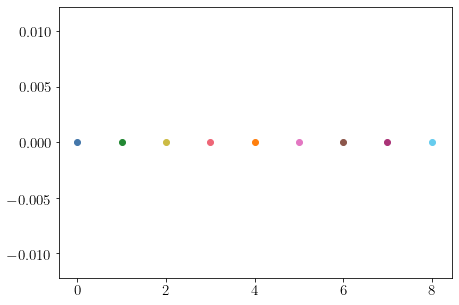

In [2]:
colors = ['#4477AA','#228833','#CCBB44','#EE6677',  '#ff7f0e', '#e377c2','#8c564b',  '#AA3377','#66CCEE']
fig, ax = plt.subplots()

for i,c in enumerate(colors):
    # if i in (3,4,5,6): continue
    ax.scatter(i,0,c=c)

plt.show()

In [90]:
sf = 10 # small font for K factors

shift=.2

def square(x,y,width=.9*shift):
    return [[x[0]-width,x[0]+width,x[1]+width,x[1]-width,x[0]-width],[y[0],y[0],y[1],y[1],y[0]]]


ylab = 800
def plot(data, proc, fname, lloc=None, lpos=[], lscale=[], kscale_lin=[], kscale_quad=[], ymin = 0.05, ymax=2000.):
    
    x = np.array(range(len(ops)))

    if len(lpos)==0:
        lpos=np.full( int((len(data)-1)/2), None)
    if len(lscale)==0:
        lscale=np.ones( int((len(data)-1)/2))
    if len(kscale_lin)==0:
        kscale_lin=np.ones( int((len(data)-1)/2))
    if len(kscale_quad)==0:
        kscale_quad=np.ones( int((len(data)-1)/2))

    lloc = lloc if lloc is not None else 'upper right'
    
    # print(data)
    i=-1
    smlo  = data[0][1]*(1+data[0][2:4]/100.)
    smnlo = data[0][4]*(1+data[0][5:7]/100.)

    
    plt.fill(*square(np.array([i,i])-shift,smlo), fc='black', alpha=.15)
    plt.fill(*square(np.array([i,i])+shift,smnlo),fc='black', linewidth=0, alpha=.3)
    plt.plot(i-shift,data[0][1],'.',color='black', markeredgewidth=0, markersize=8, alpha=.5)
    plt.plot(i+shift,data[0][4],'.',color='black', markeredgewidth=0, markersize=8)
    plt.text(0.075,0.91,'SM', color='black', ha='center', va='bottom', fontsize=16, transform=plt.gca().transAxes)
    
    plt.text(i,max(smnlo),'NLO',color='black', ha='left', va='bottom', fontsize=12)
    plt.text(i,min(smlo)*.8,'LO',color='black', ha='right', va='top', fontsize=12)


    # plt.text(i,ylab,'SM',     color='black', ha='center', va='bottom')
    plt.text(i, min(smnlo)*.8, '$K$={:.2g}'.format(data[0][7]),color='black', ha='left', va='top', fontsize=sf)

    for i in x:
        if np.abs(data[2+2*i][1]) <= 1e-8:
            continue
        
        # quadratic
        lo_quad  = data[2+2*i][1]*(1+data[2+2*i][2:4]/100.)
        nlo_quad = data[2+2*i][4]*(1+data[2+2*i][5:7]/100.)
        
        plt.fill(*square(np.array([i,i])-shift, lo_quad),fc=colors[i], alpha=.15)
        plt.fill(*square(np.array([i,i])+shift,nlo_quad),fc=colors[i], alpha=.5)
        plt.plot(i-shift, np.abs(data[2+2*i][1]),'.', color=colors[i], markeredgewidth=0, markersize=8, alpha=.5)
        plt.plot(i+shift, np.abs(data[2+2*i][4]),'.', color=colors[i], markeredgewidth=0, markersize=8)
    #     plt.text(i,ylab,ops[i],color=colors[i], ha='center', va='bottom')

        
        kpos_quad_i = min(nlo_quad)*.8*kscale_quad[i]
        plt.text(i+shift, kpos_quad_i, '${:.2g}$'.format(data[2+2*i][7]),color=colors[i], ha='center', va='top', fontsize=sf)
    #     plt.text(i,.8*min(min(lo),min(nlo)),labs[i],color=colors[i], ha='center', va='top', fontsize=15)


        # linear
        lo_lin  = np.abs(data[1+2*i][1])*(1+data[1+2*i][2:4]/100.)
        nlo_lin = np.abs(data[1+2*i][4])*(1+data[1+2*i][5:7]/100.)

        plt.fill(*square(np.array([i,i])-shift, lo_lin),fc=colors[i], alpha=.15)
        plt.fill(*square(np.array([i,i])+shift,nlo_lin),fc=colors[i], alpha=.5)
        mark = 'x' if data[1+2*i][1] <0 else '+'
        plt.plot(i-shift, np.abs(data[1+2*i][1]),mark, color=colors[i], alpha=.5)
        mark = 'x' if data[1+2*i][4] <0 else '+'
        plt.plot(i+shift, np.abs(data[1+2*i][4]),mark, color=colors[i])
    #     plt.text(i,max(max(lo),max(nlo)),ops[i],color=colors[i], ha='center', va='bottom')
        
        kpos_lin_i =  min(nlo_lin)*.8*kscale_lin[i]
        plt.text(i+shift,kpos_lin_i, '${:.2g}$'.format(data[1+2*i][7]),color=colors[i], ha='center', va='top', fontsize=sf)

        lpos_i = lpos[i] if lpos[i] is not None else 10**np.mean(np.log10(np.hstack([lo_quad,nlo_quad,lo_lin,nlo_lin])))
        plt.text(i,lpos_i*lscale[i],ops[i],color=colors[i], ha='center', va='bottom')



    # plt.errorbar(1-shift/2.,12.6,yerr=(5.8+5.2)/2,fmt='.k')
    # plt.errorbar(1+shift/2.,24.,yerr=(7+6)/2,fmt='.k')
    # plt.text(1-shift/2,2.5,'CMS', rotation=90, fontsize=10, ha='center', va='bottom') # 1908.06463
    # plt.text(1+shift/2,2.5,'ATLAS', rotation=90, fontsize=10, ha='center', va='bottom')  # 2007.14858 SS+multi (MVA)

    plt.plot(-1,1e-8,'k.', markeredgewidth=0, markersize=8, label='Quadratic')
    plt.plot(-1,1e-8,'k+', label='Linear positive')
    plt.plot(-1,1e-8,'kx', label='Linear negative')

    
    plt.yscale('log')
    plt.ylim(bottom=ymin,top=ymax)
    # plt.xticks(x,ops)
    plt.xticks([],[])
    plt.gca().yaxis.set_ticks_position('both')

    plt.tick_params(axis='y',which='both', direction='in', labelsize=18)
    
    # plt.text(lloc[0],lloc[1],' $\\bullet$ quadratic\n+ linear positive\n$\\times$ linear negative',rotation=0, ha='left', va='top', fontsize=15)
    plt.legend(frameon=False, loc=lloc, handlelength=1, handletextpad=0.2, borderaxespad=0.2)

    at = AnchoredText(
      proc,
      loc='lower right', 
      prop=dict(size=18), 
    borderpad=0.1,
      frameon=False,
    )
    # at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    plt.gca().add_artist(at)
    # plt.title(proc)

    savefig(fname)
    plt.show()

def read_table(txt):
    data = []
    ops = []
    for line in txt.split('\n'):
        found = re.findall('[0-9+\-.]{2,}',line)
        if len(found)>0:
            floats = list(map(float,found))
            if len(floats)==7:
                floats = [0.]+floats
            data.append(floats)
        op = re.findall('\$c[^$]+\$',line)
        if len(op)>0:
            ops.append(op[0])
    data = np.array(data)
    return (ops, data)

0.1820991629104958
-0.18168061815840308
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
Syntax Error: Couldn't read xref table
Syntax Warning: PDF file is damaged - attempting to reconstruct xref table...
==> 1 page written on `triboson-wwa.pdf'.
GPL Ghostscript 9.50 (2019-10-15)
Copyright (C) 2019 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
Processing pages 1 through 1.
Page 1


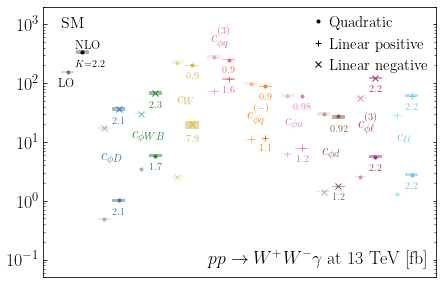

In [92]:
txt = '''    \multicolumn{2}{|c|}{SM}  & $155.3(3)^{+2.8\%}_{-3.6\%}$  & $337(1)^{+7.3\%}_{-5.7\%}$ & 2.17 \\
    \hline 
    \multirow{2}{*}{$c_{\phi D}$}  & $\mathcal{O}(\Lambda^{-2})$   & $-17.15(4)^{+3.7\%}_{-2.9\%}$ & $-36.6(1)^{+5.6\%}_{-7.1\%}$ & 2.14 \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & 0.493(1)$^{+2.9\%}_{-3.8\%}$ & 1.018(3)$^{+6.9\%}_{-5.4\%}$ & 2.07 \\ 
    \hline 
    \multirow{2}{*}{$c_{\phi WB}$} &  $\mathcal{O}(\Lambda^{-2})$   & $-30.30(7)^{+3.7\%}_{-2.9\%}$ & $-68.5(2)^{+5.9\%}_{-7.5\%}$ & 2.26 \\
    &$\mathcal{O}(\Lambda^{-4})$ & 3.51(3)$^{+0.0\%}_{-0.3\%}$ & 5.87(4)$^{+6.0\%}_{-4.7\%}$ & 1.67 \\
    \hline \
    \multirow{2}{*}{$c_{W}$} & $\mathcal{O}(\Lambda^{-2})$  & $-2.54(3)^{+4.6\%}_{-4.7\%}$ & $-20.0(4)^{+13.0\%}_{-16.8\%}$ & 7.86 \\ 
    &$\mathcal{O}(\Lambda^{-4})$  & $223.6(8)^{+8.5\%}_{-7.2\%}$ & $201(3)^{+2.8\%}_{-1.3\%}$ & 0.90 \\ 
    
    \hline 
    \multirow{2}{*}{$c_{\phi q}^{(3)}$} & $\mathcal{O}(\La|mbda^{-2})$      & 72.6(1)$^{+1.7\%}_{-2.3\%}$ & 118.0(5)$^{+5.0\%}_{-3.8\%}$ & 1.63 \\ 
    & $\mathcal{O}(\Lambda^{-4})$ & 278.4(8)$^{+7.4\%}_{-6.3\%}$ & 251(3)$^{+1.8\%}_{-0.8\%}$ & 0.90  \\ 
    \hline 
    \multirow{2}{*}{$c_{\phi q}^{(-)}$} & $\mathcal{O}(\Lambda^{-2})$ & 11.17(6)$^{+1.0\%}_{-1.6\%}$ & 11.7(2)$^{+1.0\%}_{-0.9\%}$ & 1.05 \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & 97.6(5)$^{+7.6\%}_{-6.5\%}$ & 88(1)$^{+1.3\%}_{-1.1\%}$ & 0.90 \\
    \hline
    \multirow{2}{*}{$c_{\phi u}$} & $\mathcal{O}(\Lambda^{-2})$     & 6.35(2)$^{+0.2\%}_{-0.8\%}$ & 7.76(5)$^{+2.8\%}_{-2.6\%}$ & 1.22 \\
    & $\mathcal{O}(\Lambda^{-4})$  & 61.5(3)$^{+7.8\%}_{-6.6\%}$ & 60(1)$^{+2.4\%}_{-0.6\%}$ & 0.98  \\
    \hline 
    \multirow{2}{*}{$c_{\phi d}$} & $\mathcal{O}(\Lambda^{-2})$     & $-1.437(4)^{+0.2\%}_{-0.0\%}$ & $-1.784(7)^{+1.8\%}_{-2.6\%}$ & 1.24 \\
    & $\mathcal{O}(\Lambda^{-4})$ & 29.5(2)$^{+7.8\%}_{-6.7\%}$ & 27.2(3)$^{+6.6\%}_{-8.9\%}$ & 0.92  \\ 
    \hline 
    \multirow{2}{*}{$c_{\phi \ell}^{(3)}$} & $\mathcal{O}(\Lambda^{-2})$ & $-56.43(9)^{+2.6\%}_{-2.0\%}$ & $-123.7(3)^{+4.1\%}_{-5.2\%}$ & 2.19 \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & 2.566(4)$^{+2.0\%}_{-2.6\%}$  & 5.62(1)$^{+5.2\%}_{-4.1\%}$ & 2.19 \\
    \hline
    
    \multirow{2}{*}{$c_{\ell \ell}$} & $\mathcal{O}(\Lambda^{-2})$ & 28.28(6)$^{+2.8\%}_{-3.6\%}$ & 61.3(2)$^{+7.3\%}_{-5.7\%}$ & 2.17 \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & 1.286(3)$^{+2.8\%}_{-3.6\%}$ & 2.785(9)$^{+7.3\%}_{-5.7\%}$ & 2.17 \\ '''

ops, data = read_table(txt)
d=data
print(d[-2,1]/d[0,1])
print(d[-4,1]/d[0,1]/2.)# print()

lscale = np.ones(9)
lscale[1] = 0.7
lscale[3] = 2.5
lscale[4] = 0.6
lscale[5] = 0.8
lscale[6] = 0.75
lscale[7] = 0.75

proc  = '$pp\\to W^+W^-\\gamma$ at 13 TeV [fb]'
fname = 'triboson-wwa.pdf'
lloc  = 0.35,0.15
plot(data,proc,fname, lscale=lscale)

In [93]:
def empty_rows(d):
    dd = [d[0]]
    for i in range(len(ops)):
        if ops[i] not in o:
            dd.append([1e-8]*8)
            dd.append([1e-8]*8)
        else:
            print(ops[i])
            dd.append(d[1+2*o.index(ops[i])])
            dd.append(d[2+2*o.index(ops[i])])
    return( np.array(dd) )

0.18248429867411028
-0.1819609211444522
$c_{\phi D}$
$c_{\phi WB}$
$c_{W}$
$c_{\phi q}^{(3)}$
$c_{\phi \ell}^{(3)}$
$c_{\ell \ell}$
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
Syntax Error: Couldn't read xref table
Syntax Warning: PDF file is damaged - attempting to reconstruct xref table...
==> 1 page written on `triboson-waa.pdf'.
GPL Ghostscript 9.50 (2019-10-15)
Copyright (C) 2019 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
Processing pages 1 through 1.
Page 1


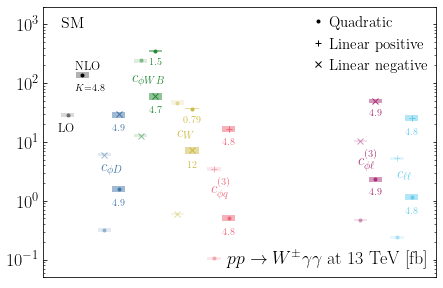

In [94]:
txt = '''    \multicolumn{2}{|c|}{SM} & $28.66(7)^{+6.3\%}_{-7.4\%}$ & $138.6(8)^{+12.5\%}_{-11.2\%}$ & 4.84\\ 
    \hline 
    \multirow{2}{*}{$c_{\phi D}$} & $\mathcal{O}(\Lambda^{-2})$ & $-6.07(1)^{+7.4\%}_{-6.3\%}$ & $-29.5(2)^{+11.4\%}_{-12.8\%}$ & 4.86 \\
    &$\mathcal{O}(\Lambda^{-4})$ & 0.3218(8)$^{+6.3\%}_{-7.4\%}$ & 1.56(1)$^{+12.8\%}_{-11.4\%}$ & 4.86 \\ 
    \hline
    \multirow{2}{*}{$c_{\phi WB}$} & $\mathcal{O}(\Lambda^{-2})$ & $-12.8(2)^{+7.5\%}_{-6.4\%}$ & $-60(1)^{+11.1\%}_{-12.4\%}$ & 4.70 \\
    & $\mathcal{O}(\Lambda^{-4})$ & 243.5(4)$^{+6.8\%}_{-8.0\%}$ & 356.8(9)$^{+4.1\%}_{-5.3\%}$ & 1.47 \\
    \hline
    \multirow{2}{*}{$c_{W}$} & $\mathcal{O}(\Lambda^{-2})$  & $-0.591(2)^{+5.6\%}_{-4.6\%}$ & $-7.23(3)^{+12.2\%}_{-15.4\%}$ & 12.24 \\
    &$\mathcal{O}(\Lambda^{-4})$ & $46.8(2)^{+9.8\%}_{-8.1\%}$ & $36.8(9)^{+4.0\%}_{-3.2\%}$ & 0.79  \\ 
    \hline
    \multirow{2}{*}{$c_{\phi q}^{(3)}$} & $\mathcal{O}(\Lambda^{-2})$  & 3.48(1)$^{+6.3\%}_{-7.5\%}$  & 16.7(1)$^{+12.8\%}_{-11.4\%}$ & 4.80 \\
    &$\mathcal{O}(\Lambda^{-4})$ & 0.1054(4)$^{+6.3\%}_{-7.5\%}$ & 0.506(4)$^{+12.8\%}_{-11.4\%}$ & 4.80 \\ 
    \hline
    \multirow{2}{*}{$c_{\phi \ell}^{(3)}$} & $\mathcal{O}(\Lambda^{-2})$  & $-10.43(2)^{+5.3\%}_{-4.5\%}$ & $-50.6(2)^{+8.0\%}_{-9.0\%}$ & 4.86 \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & 0.474(1)$^{+4.5\%}_{-5.3\%}$ & 2.30(1)$^{+9.0\%}_{-8.0\%}$ & 4.86 \\
    \hline 
    \multirow{2}{*}{$c_{\ell \ell}$} & $\mathcal{O}(\Lambda^{-2})$ & 5.23(2)$^{+6.3\%}_{-7.5\%}$ & 25.2(2)$^{+12.7\%}_{-11.4\%}$ & 4.82 \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & 0.2376(7)$^{+6.3\%}_{-7.5\%}$ & 1.145(7)$^{+12.7\%}_{-11.4\%}$ & 4.82 \\'''
o,d=read_table(txt)
print(d[-2,1]/d[0,1])
print(d[-4,1]/d[0,1]/2.)# print()
dd = empty_rows(d)
proc  = '$pp\\to W^\pm\\gamma\\gamma$ at 13 TeV [fb]'
fname = 'triboson-waa.pdf'
lloc  = 0.47,0.65
lscale = np.ones(9)
lscale[0] = 0.9
lscale[2] = 1.1
lscale[3] = 0.8
lscale[7] = 0.65
lscale[8] = 0.85
plot(dd,proc,fname,lscale=lscale)

0.1819505094614265
-0.18151382823871906
$c_{\phi D}$
$c_{\phi WB}$
$c_{W}$
$c_{\phi q}^{(3)}$
$c_{\phi q}^{(-)}$
$c_{\phi \ell}^{(3)}$
$c_{\ell \ell}$
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
Syntax Error: Couldn't read xref table
Syntax Warning: PDF file is damaged - attempting to reconstruct xref table...
==> 1 page written on `triboson-wza.pdf'.
GPL Ghostscript 9.50 (2019-10-15)
Copyright (C) 2019 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
Processing pages 1 through 1.
Page 1


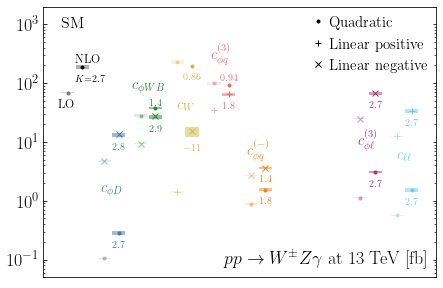

In [95]:
txt = '''\multicolumn{2}{|c|}{SM} & $68.7(2)^{+2.1\%}_{-2.9\%}$ & $186.4(6)^{+8.9\%}_{-7.1\%}$ & 2.71 \\ 
    \hline 
    \multirow{2}{*}{$c_{\phi D}$} & $\mathcal{O}(\Lambda^{-2})$ & $-4.74(1)^{+2.8\%}_{-2.0\%}$ & $-13.43(5)^{+7.3\%}_{-9.2\%}$ & 2.84 \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & 0.1054(3)$^{+2.2\%}_{-3.0\%}$ & 0.286(1)$^{+8.8\%}_{-7.0\%}$ &  2.71 \\ 
    \hline 
    \multirow{2}{*}{$c_{\phi WB}$} & $\mathcal{O}(\Lambda^{-2})$  & $-9.32(3)^{+2.9\%}_{-2.2\%}$ & $-27.1(1)^{+7.4\%}_{-9.3\%}$ & 2.90 \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & 28.1(1)$^{+4.8\%}_{-5.7\%}$ & 37.8(2)$^{+2.7\%}_{-3.4\%}$ & 1.35 \\ 
    \hline 
    \multirow{2}{*}{$c_{W}$} & $\mathcal{O}(\Lambda^{-2})$  & $1.42(1)^{+3.4\%}_{-4.4\%}$ & $-15.2(2)^{+16.4\%}_{-21.1\%}$ & $-10.72$ \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & $225.5(7)^{+9.2\%}_{-7.7\%}$ & $194(1)^{+2.4\%}_{-0.8\%}$ & 0.86 \\ 
    \hline 
    \multirow{2}{*}{$c_{\phi q}^{(3)}$} & $\mathcal{O}(\Lambda^{-2})$ & 35.26(6)$^{+0.6\%}_{-1.1\%}$ & 64.4(3)$^{+6.4\%}_{-5.0\%}$ & 1.83 \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & 98.6(3)$^{+7.7\%}_{-6.5\%}$ & 92.7(8)$^{+1.4\%}_{-1.2\%}$ & 0.94  \\ 
    \hline 
    \multirow{2}{*}{$c_{\phi q}^{(-)}$} & $\mathcal{O}(\Lambda^{-2})$ & $-2.69(3)^{+3.1\%}_{-2.3\%}$ & $-3.6(1)^{+2.8\%}_{-3.0\%}$ & 1.35 \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & 0.883(2)$^{+2.8\%}_{-3.7\%}$ & 1.551(6)$^{+5.1\%}_{-4.2\%}$ & 1.76\\ 
    \hline 
    \multirow{2}{*}{$c_{\phi \ell}^{(3)}$} & $\mathcal{O}(\Lambda^{-2})$ & $-24.94(4)^{+2.0\%}_{-1.5\%}$ & $-67.5(2)^{+5.0\%}_{-6.3\%}$ & 2.71 \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & 1.134(2)$^{+1.5\%}_{-2.0\%}$ & 3.069(7)$^{+6.3\%}_{-5.0\%}$ & 2.71 \\ 
    \hline 
    \multirow{2}{*}{$c_{\ell \ell}$} & $\mathcal{O}(\Lambda^{-2})$ & 12.50(3)$^{+2.1\%}_{-2.9\%}$ & 33.8(1)$^{+9.0\%}_{-7.2\%}$ & 2.70 \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & 0.569(1)$^{+2.1\%}_{-2.9\%}$ & 1.537(6)$^{+9.0\%}_{-7.2\%}$ & 2.70 \\'''
o,d = read_table(txt)
print(d[-2,1]/d[0,1])
print(d[-4,1]/d[0,1]/2.)

ddd = empty_rows(d)
proc  = '$pp\\to W^\pm Z\\gamma$ at 13 TeV [fb]'
fname = 'triboson-wza.pdf'
lloc  = 0.5,0.73
kscale_quad = np.ones(int((len(data)-1)/2))
lscale = np.ones(9)
lscale[1] = 3
kscale_quad[1] = 1.9
lscale[3] = 3
kscale_quad[3] = 2
lscale[4] = 2.5
lscale[7] = 0.8

# kscale[1] = 2
# lscale[3] = 1.5
# kscale[3] = 2
# lscale[4] = .15
plot(ddd,proc,fname, lscale=lscale, kscale_quad=kscale_quad)

$c_{\phi D}$
$c_{\phi WB}$
$c_{W}$
$c_{\phi q}^{(3)}$
$c_{\phi q}^{(-)}$
$c_{\phi \ell}^{(3)}$
$c_{\ell \ell}$
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
Syntax Error: Couldn't read xref table
Syntax Warning: PDF file is damaged - attempting to reconstruct xref table...
==> 1 page written on `triboson-www.pdf'.
GPL Ghostscript 9.50 (2019-10-15)
Copyright (C) 2019 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
Processing pages 1 through 1.
Page 1


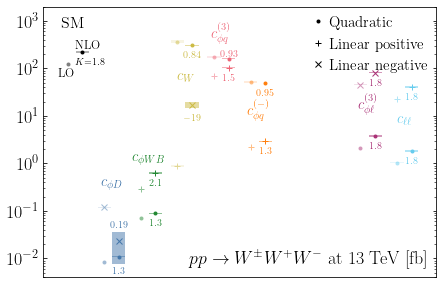

In [96]:
txt = '''
    \multicolumn{2}{|c|}{SM}  & $126.0(2)^{+0.3\%}_{-0.6\%}$  & $223.8(9)^{+5.0\%}_{-3.9\%}$ & 1.78 \\
    \hline 
    \multirow{2}{*}{$c_{\phi D}$}  & $\mathcal{O}(\Lambda^{-2})$   & $-0.1191(8)^{+2.2\%}_{-1.7\%}$ & $-0.023(1)^{+54.9\%}_{-66.2\%}$ & 0.19 \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & 0.00830(1)$^{+0.3\%}_{-0.6\%}$ & $0.01092(1)^{+2.3\%}_{-1.7\%}$ & 1.32 \\ 
    \hline 
    \multirow{2}{*}{$c_{\phi WB}$} &  $\mathcal{O}(\Lambda^{-2})$   & $0.288(1)^{+0.1\%}_{-0.4\%}$ & $0.62(2)^{+6.2\%}_{-4.9\%}$ & 2.15 \\
    &$\mathcal{O}(\Lambda^{-4})$ & 0.0706(2)$^{+1.4\%}_{-1.4\%}$ & $0.0893(1)^{+2.0\%}_{-1.6\%}$ & 1.26 \\
    \hline 
    \multirow{2}{*}{$c_{W}$} & $\mathcal{O}(\Lambda^{-2})$  & $0.89(1)^{+3.4\%}_{-4.4\%}$ & $-16.9(2)^{+15.6\%}_{-12.1\%}$ & -18.99 \\ 
    &$\mathcal{O}(\Lambda^{-4})$  & $364(1)^{+7.6\%}_{-6.3\%}$ & $304.3(4)^{+1.5\%}_{-0.7\%}$ & 0.84 \\ 
    \hline 
    \multirow{2}{*}{$c_{\phi q}^{(3)}$} & $\mathcal{O}(\Lambda^{-2})$      & 68.80(9)$^{+0.1\%}_{-0.4\%}$ & $102.9(1)^{+3.7\%}_{-2.9\%}$ & 1.50 \\ 
    & $\mathcal{O}(\Lambda^{-4})$ & $172.3(8)^{+6.5\%}_{-5.5\%}$ & $159.8(2)^{+1.1\%}_{-1.1\%}$ & 0.93  \\ 
    \hline 
    \multirow{2}{*}{$c_{\phi q}^{(-)}$} & $\mathcal{O}(\Lambda^{-2})$ & 2.19(2)$^{+0.5\%}_{-0.7\%}$ & $2.93(7)^{+2.6\%}_{-1.9\%}$ & 1.34 \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & 51.1(3)$^{+6.2\%}_{-5.3\%}$ & $48.78(6)^{+1.0\%}_{-1.2\%}$ & 0.95 \\
    \hline
    \multirow{2}{*}{$c_{\phi \ell}^{(3)}$} & $\mathcal{O}(\Lambda^{-2})$ & $-45.76(6)^{+0.5\%}_{-0.2\%}$ & $-81.4(3)^{+5.0\%}_{-3.9\%}$& 1.78 \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & $2.080(3)^{+0.2\%}_{-0.5\%}$  & $3.70(1)^{+5.0\%}_{-3.9\%}$  & 1.78 \\
    \hline
    \multirow{2}{*}{$c_{\ell \ell}$} & $\mathcal{O}(\Lambda^{-2})$ & $22.92(5)^{+0.3\%}_{-0.7\%}$ & $40.7(2)^{+5.0\%}_{-3.9\%}$ & 1.78 \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & $1.042(2)^{+0.3\%}_{-0.7\%}$ & $1.851(7)^{+5.0\%}_{-3.9\%}$ & 1.78 \\ 
    \hline
\end{tabular}'''
o,d = read_table(txt)
ddd = empty_rows(d)

proc  = r'$pp\to W^\pm W^{+}W^{-}$ at 13 TeV [fb]'
fname = 'triboson-www.pdf'
lloc  = 0.43,0.5
kscale_lin = np.ones(int((len(data)-1)/2))
kscale_quad = np.ones(int((len(data)-1)/2))
lscale = np.ones(int((len(data)-1)/2))

lscale[0] = 13
kscale_lin[0] = 10
kscale_quad[0] = 0.8
lscale[1] = 5
lscale[2] = 1.3
kscale_quad[3] = 2
lscale[3] = 2.7
lscale[4] = 0.7

# lscale[2] = 0.1
# lscale[3] = 1.5
lscale[7] = 0.8
lscale[8] = 0.9
plot(ddd,proc,fname, lscale=lscale, kscale_lin=kscale_lin, kscale_quad=kscale_quad, ymin=0.004)

$c_{\phi D}$
$c_{\phi WB}$
$c_{W}$
$c_{\phi q}^{(3)}$
$c_{\phi q}^{(-)}$
$c_{\phi u}$
$c_{\phi d}$
$c_{\phi \ell}^{(3)}$
$c_{\ell \ell}$
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
Syntax Error: Couldn't read xref table
Syntax Warning: PDF file is damaged - attempting to reconstruct xref table...
==> 1 page written on `triboson-wwz.pdf'.
GPL Ghostscript 9.50 (2019-10-15)
Copyright (C) 2019 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
Processing pages 1 through 1.
Page 1


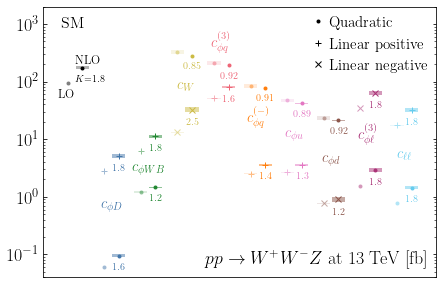

In [97]:
txt = '''
    \multicolumn{2}{|c|}{SM}  & $94.6(2)^{+0.1\%}_{-0.5\%}$  & $173.6(4)^{+7.9\%}_{-6.1\%}$ &  1.84 \\
    \hline 
    \multirow{2}{*}{$c_{\phi D}$}  & $\mathcal{O}(\Lambda^{-2})$   & $2.757(9)^{+0.0\%}_{-0.4\%}$ & $5.05(1)^{+8.2\%}_{-6.4\%}$ & 1.83 \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & 0.0607(2)$^{+0.3\%}_{-0.8\%}$ & 0.0942(4)$^{+5.7\%}_{-4.4\%}$ & 1.55 \\ 
    \hline 
    \multirow{2}{*}{$c_{\phi WB}$} &  $\mathcal{O}(\Lambda^{-2})$   & 6.13(1)$^{+0.0\%}_{-0.4\%}$ & $11.19(4)^{+7.4\%}_{-5.7\%}$ & 1.83 \\
    &$\mathcal{O}(\Lambda^{-4})$ & 1.221(5)$^{+3.8\%}_{-3.5\%}$ & $1.449(5)^{+2.6\%}_{-2.3\%}$ & 1.19 \\
    \hline 
    \multirow{2}{*}{$c_{W}$} & $\mathcal{O}(\Lambda^{-2})$  & $-13.05(2)^{+1.8\%}_{-1.6\%}$ & $-32.0(1)^{+11.5\%}_{-8.9\%}$ & 2.45 \\ 
    &$\mathcal{O}(\Lambda^{-4})$  & $327.0(8)^{+9.4\%}_{-7.9\%}$ & $277.0(1)^{+1.9\%}_{-1.1\%}$ & 0.85 \\ 
    \hline 
    \multirow{2}{*}{$c_{\phi q}^{(3)}$} & $\mathcal{O}(\Lambda^{-2})$      & 51.07(9)$^{+1.3\%}_{-1.5\%}$ & 79.5(7)$^{+6.0\%}_{-4.7\%}$ & 1.56 \\ 
    & $\mathcal{O}(\Lambda^{-4})$ & 209.5(8)$^{+8.4\%}_{-7.1\%}$ & 193.2(8)$^{+1.6\%}_{-1.6\%}$ &  0.92 \\ 
    \hline 
    \multirow{2}{*}{$c_{\phi q}^{(-)}$} & $\mathcal{O}(\Lambda^{-2})$ & 2.52(4)$^{+1.8\%}_{-2.0\%}$ & 3.5(4)$^{+5.1\%}_{-3.5\%}$ & 1.39 \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & 84.6(4)$^{+8.0\%}_{-6.9\%}$ & 77.1(3)$^{+1.5\%}_{-1.1\%}$ & 0.91 \\
    \hline
    \multirow{2}{*}{$c_{\phi u}$} & $\mathcal{O}(\Lambda^{-2})$     & 2.684(5)$^{+1.8\%}_{-1.9\%}$ & 3.5(2)$^{+4.4\%}_{-3.3\%}$ & 1.30 \\
    & $\mathcal{O}(\Lambda^{-4})$  & 46.9(5)$^{+8.2\%}_{-7.0\%}$ & 41.8(2)$^{+1.7\%}_{-1.1\%}$ &  0.89 \\
    \hline 
    \multirow{2}{*}{$c_{\phi d}$} & $\mathcal{O}(\Lambda^{-2})$     & $-0.773(2)^{+2.3\%}_{-2.2\%}$ & $-0.9(2)^{+8.1\%}_{-9.7\%}$ & 1.16 \\
    & $\mathcal{O}(\Lambda^{-4})$ & 23.2(1)$^{+8.4\%}_{-7.1\%}$ & 21.25(7)$^{+1.7\%}_{-1.2\%}$ &  0.92 \\ 
    \hline 
    \multirow{2}{*}{$c_{\phi \ell}^{(3)}$} & $\mathcal{O}(\Lambda^{-2})$ & $-34.43(5)^{+0.3\%}_{-0.0\%}$ & $-63.2(1)^{+7.9\%}_{-6.1\%}$ & 1.84 \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & $1.565(2)^{+0.0\%}_{-0.3\%}$  & $2.872(7)^{+7.9\%}_{-6.1\%}$ & 1.84 \\
    \hline
    \multirow{2}{*}{$c_{\ell \ell}$} & $\mathcal{O}(\Lambda^{-2})$ & $17.27(4)^{+0.1\%}_{-0.5\%}$ & $31.58(7)^{+7.9\%}_{-6.1\%}$ & 1.83 \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & $0.785(2)^{+0.1\%}_{-0.5\%}$ & $1.436(3)^{+7.9\%}_{-6.1\%}$ & 1.83 \\ 
    \hline
\end{tabular}'''
o,d = read_table(txt)
ddd = empty_rows(d)
proc  = r'$pp\to W^{+}W^{-}Z$ at 13 TeV [fb]'
fname = 'triboson-wwz.pdf'
lloc  = 0.33,0.2
kscale_lin = np.ones(int((len(data)-1)/2))
kscale_quad = np.ones(int((len(data)-1)/2))
lscale = np.ones(int((len(data)-1)/2))

lscale[1] = 0.7
lscale[2] = 0.8
# kscale_quad[3] = 2
lscale[3] = 2.7
lscale[5] = 0.8
lscale[6] = 0.8
lscale[7] = 0.8
lscale[8] = 0.8
# kscale_lin[0] = 10
# kscale_quad[0] = 0.8
# lscale[1] = 5
# lscale[7] = 0.8
# lscale[8] = 0.9
plot(ddd,proc,fname, lscale=lscale, kscale_lin=kscale_lin, kscale_quad=kscale_quad, ymin=0.04)

0.18220757825370676
-0.18204283360790774
$c_{\phi D}$
$c_{\phi WB}$
$c_{W}$
$c_{\phi q}^{(3)}$
$c_{\phi q}^{(-)}$
$c_{\phi \ell}^{(3)}$
$c_{\ell \ell}$
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
Syntax Error: Couldn't read xref table
Syntax Warning: PDF file is damaged - attempting to reconstruct xref table...
==> 1 page written on `triboson-wzz.pdf'.
GPL Ghostscript 9.50 (2019-10-15)
Copyright (C) 2019 Artifex Software, Inc.  All rights reserved.
This software is supplied under the GNU AGPLv3 and comes with NO WARRANTY:
see the file COPYING for details.
Processing pages 1 through 1.
Page 1


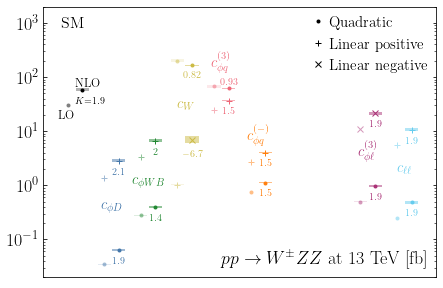

In [98]:
txt = '''
    \multicolumn{2}{|c|}{SM}  & $30.35(5)^{+0.2\%}_{-0.4\%}$  & $58.35(3)^{+6.4\%}_{-5.1\%}$ & 1.92 \\
    \hline 
    \multirow{2}{*}{$c_{\phi D}$}  & $\mathcal{O}(\Lambda^{-2})$   & $1.367(4)^{+0.3\%}_{-0.5\%}$ & $2.823(1)^{+7.2\%}_{-5.8\%}$ & 2.07 \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & $0.0346(1)^{+0.3\%}_{-0.5\%}$ & $0.0639(5)^{+6.3\%}_{-5.0\%}$ & 1.85 \\ 
    \hline 
    \multirow{2}{*}{$c_{\phi WB}$} &  $\mathcal{O}(\Lambda^{-2})$   & $3.371(7)^{+0.2\%}_{-0.5\%}$ & $6.679(6)^{+6.5\%}_{-5.1\%}$ & 1.98 \\
    &$\mathcal{O}(\Lambda^{-4})$ & $0.278(2)^{+3.1\%}_{-2.8\%}$ & $0.3936(7)^{+4.0\%}_{-3.4\%}$ & 1.42 \\
    \hline 
    \multirow{2}{*}{$c_{W}$} & $\mathcal{O}(\Lambda^{-2})$  & $1.028(7)^{+1.2\%}_{-1.8\%}$ & $-6.91(8)^{+18.2\%}_{-14.2\%}$ & -6.72 \\ 
    &$\mathcal{O}(\Lambda^{-4})$  & $199.1(4)^{+7.6\%}_{-6.4\%}$ & $164.0(3)^{+1.7\%}_{-0.9\%}$ & 0.82 \\ 
    \hline 
    \multirow{2}{*}{$c_{\phi q}^{(3)}$} & $\mathcal{O}(\Lambda^{-2})$      & $24.74(3)^{+0.9\%}_{-1.1\%}$ & $36.73(7)^{+4.3\%}_{-3.4\%}$ & 1.48 \\ 
    & $\mathcal{O}(\Lambda^{-4})$ & $67.0(2)^{+6.9\%}_{-5.8\%}$ & $62.0(5)^{+1.3\%}_{-1.3\%}$ &  0.93 \\ 
    \hline 
    \multirow{2}{*}{$c_{\phi q}^{(-)}$} & $\mathcal{O}(\Lambda^{-2})$ & $2.66(2)^{+0.1\%}_{-0.3\%}$ & $4.032(6)^{+3.3\%}_{-2.5\%}$ & 1.52 \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & $0.741(2)^{+0.0\%}_{-0.3\%}$ & $1.125(1)^{+4.0\%}_{-3.2\%}$ & 1.52 \\
    \hline
    \multirow{2}{*}{$c_{\phi \ell}^{(3)}$} & $\mathcal{O}(\Lambda^{-2})$ & $-11.05(1)^{+0.3\%}_{-0.1\%}$ & $-21.23(1)^{+6.4\%}_{-5.1\%}$ & 1.92 \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & $0.5022(6)^{+0.1\%}_{-0.3\%}$  & $0.9652(5)^{+6.4\%}_{-5.1\%}$ & 1.92 \\
    \hline
    \multirow{2}{*}{$c_{\ell \ell}$} & $\mathcal{O}(\Lambda^{-2})$ & $5.53(1)^{+0.2\%}_{-0.4\%}$ & $10.614(5)^{+6.4\%}_{-5.1\%}$ & 1.92 \\ 
    &$\mathcal{O}(\Lambda^{-4})$ & $0.2516(5)^{+0.2\%}_{-0.4\%}$ & $0.4826(2)^{+6.4\%}_{-5.1\%}$ & 1.92 \\ 
    \hline
\end{tabular}'''
o,d = read_table(txt)
print(d[-2,1]/d[0,1])
print(d[-4,1]/d[0,1]/2.)# print()
ddd = empty_rows(d)
proc  = r'$pp\to W^{\pm}ZZ$ at 13 TeV [fb]'
fname = 'triboson-wzz.pdf'
lloc  = 0.43,0.5
kscale_lin = np.ones(int((len(data)-1)/2))
kscale_quad = np.ones(int((len(data)-1)/2))
lscale = np.ones(int((len(data)-1)/2))

lscale[1] = 0.7
kscale_quad[3] = 2
lscale[3] = 2.7
# kscale_quad[4] = 2
lscale[4] = 3

# kscale_lin[0] = 10
# kscale_quad[0] = 0.8
# lscale[1] = 5
lscale[7] = 0.8
lscale[8] = 0.9
plot(ddd,proc,fname, lscale=lscale, kscale_lin=kscale_lin, kscale_quad=kscale_quad, ymin=0.02)